# Spatial Data frames, arcpy and the Python API for local data
This notebook works with local data in filegeodatabases, using spatial data frames and arcpy to access local data and geoprocessing. You will need arcpy installed (By installing ArcGIS Pro) to use this

import arcpy as well as the arcgis api for python

In [1]:
import arcpy
import os
from arcgis import GIS
from arcgis.features import SpatialDataFrame

Get the sample data from ArcGIS Online, by downloading and unzipping the file https://github.com/dstubbins/notebook-examples/blob/master/OSOpenRoadsSample.gdb.zip

Use arcpy to list the contents of a local file geodatabase

In [2]:
arcpy.env.workspace = "C:\\Data\\OSOpenRoadsSample.gdb"

datasets = arcpy.ListDatasets(feature_type='feature')
datasets = [''] + datasets if datasets is not None else []

for ds in datasets:
    for fc in arcpy.ListFeatureClasses(feature_dataset=ds):
        path = os.path.join(arcpy.env.workspace, ds, fc)
        print(path)



C:\Data\OSOpenRoadsSample.gdb\SZ_RoadLink
C:\Data\OSOpenRoadsSample.gdb\SZ_RoadNode


Create a spatially enabled dataframe from a featureclass in a geodatabase

In [3]:
sdf = SpatialDataFrame.from_featureclass('C:\Data\OSOpenRoadsSample.gdb\SZ_RoadLink')
sdf.tail()

,OBJECTID,fictitious,identifier,class,roadNumber,name1,name1_lang,name2,name2_lang,formOfWay,...,primary,trunkRoad,loop,startNode,endNode,structure,nameTOID,numberTOID,function,SHAPE
38367,38368,false,22DD7471-5E77-49BF-840F-E80A1D9D1672,Unclassified,,Burnham's Lane,,,,Single Carriageway,...,false,false,false,0EEB4DC9-4C04-4146-BD54-444A5549C452,FF8E37BE-314F-41CA-A00D-E33DCD5DE01B,,osgb4000000026192123,,Minor Road,"{'hasZ': True, 'hasM': True, 'paths': [[[40022..."
38368,38369,false,A3525E5A-B26A-4304-8D02-52E69D40A99C,Unknown,,,,,,Single Carriageway,...,false,false,false,FF8E37BE-314F-41CA-A00D-E33DCD5DE01B,9C64F682-5F99-462C-8B05-3779CE80497D,,,,Restricted Local Access Road,"{'hasZ': True, 'hasM': True, 'paths': [[[40095..."
38369,38370,false,0228CD38-90C1-47A1-826C-6F01118AC9A5,B Road,B3069,High Street,,,,Single Carriageway,...,false,false,false,2010D55C-8F87-4868-8993-8026831B36C7,48B272BA-E259-4A8E-BE1F-7669A7760F4F,,osgb4000000026194616,osgb4000000026200648,B Road,"{'hasZ': True, 'hasM': True, 'paths': [[[40003..."
38370,38371,false,0825A040-D4C9-4595-8389-107A62B74789,Unknown,,,,,,Single Carriageway,...,false,false,false,2010D55C-8F87-4868-8993-8026831B36C7,B85DDEA5-3950-45AD-8569-16D51BEB57C5,,,,Restricted Local Access Road,"{'hasZ': True, 'hasM': True, 'paths': [[[40003..."
38371,38372,false,FEA5AA37-7797-47D9-BAD9-431E41AE6B60,A Road,A351,Valley Road,,,,Single Carriageway,...,false,false,false,CF3E04F4-E54E-4382-A6CD-BBBFCAF3BB54,D09558E3-26FD-4ACF-92CE-818BEC568CEB,,osgb4000000026192999,osgb4000000025961505,A Road,"{'hasZ': True, 'hasM': True, 'paths': [[[39994..."


describe the data

In [4]:
sdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38372 entries, 0 to 38371
Data columns (total 20 columns):
OBJECTID      38372 non-null int64
fictitious    38372 non-null object
identifier    38372 non-null object
class         38372 non-null object
roadNumber    38372 non-null object
name1         38372 non-null object
name1_lang    38372 non-null object
name2         38372 non-null object
name2_lang    38372 non-null object
formOfWay     38372 non-null object
length        38372 non-null int64
primary       38372 non-null object
trunkRoad     38372 non-null object
loop          38372 non-null object
startNode     38372 non-null object
endNode       38372 non-null object
structure     38372 non-null object
nameTOID      38372 non-null object
numberTOID    38372 non-null object
function      38372 non-null object
dtypes: int64(2), object(18)
memory usage: 5.9+ MB


In [5]:
sdf[['OBJECTID']].count()

OBJECTID    38372
dtype: int64

# Do some Pandas Stuff

How many of each type of road?

In [6]:
sdfgroup=sdf.groupby(['class'])['OBJECTID'].count()
sdfgroup

class
A Road                    2329
B Road                    1985
Classified Unnumbered     3176
Not Classified            3891
Unclassified             19126
Unknown                   7865
Name: OBJECTID, dtype: int64

Make a graph

In [7]:
import matplotlib.pyplot as plt

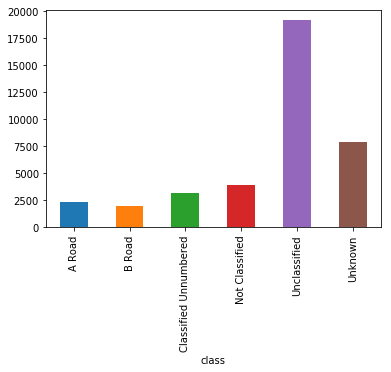

In [8]:
sdfgroup.plot.bar()

# Query the dataframe

In [9]:
sdfARoads = sdf[sdf['class']=='A Road']

In [10]:
sdfARoads['OBJECTID'].count()

2329

# Add a map to our notebook

In [11]:
agol=GIS()

In [12]:
m1 = agol.map()
m1.basemap='os_open_background'
m1

MapView(layout=Layout(height='400px', width='100%'))

Set the map extent

In [13]:
m1.extent={'spatialReference': {'latestWkid': 27700, 'wkid': 27700},
 'xmin': 424993.2379115089,
 'ymin': 73324.90305999425,
 'xmax': 488162.6350836366,
 'ymax': 99783.28931010008}
m1.mode='3D'
m1.mode='2D'

In [15]:
sdfARoads.spatial.plot(map_widget=m1,
            symbol_type='simple',
            colors = 'Reds_r')

True

In [16]:
sdfBRoads=sdf[sdf['class']=='B Road']
sdfBRoads['OBJECTID'].count()

1985

In [17]:
sdfBRoads.spatial.plot(map_widget=m1,
            symbol_type='simple',
            colors = 'Blues_r')

True

# Spatial Joins in pandas

intersect the A roads and the B Roads

In [19]:
sdfjoin=sdfBRoads.spatial.join(sdfARoads)
sdfjoin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 41 columns):
OBJECTID_left       190 non-null int64
fictitious_left     190 non-null object
identifier_left     190 non-null object
class_left          190 non-null object
roadNumber_left     190 non-null object
name1_left          190 non-null object
name1_lang_left     190 non-null object
name2_left          190 non-null object
name2_lang_left     190 non-null object
formOfWay_left      190 non-null object
length_left         190 non-null int64
primary_left        190 non-null object
trunkRoad_left      190 non-null object
loop_left           190 non-null object
startNode_left      190 non-null object
endNode_left        190 non-null object
structure_left      190 non-null object
nameTOID_left       190 non-null object
numberTOID_left     190 non-null object
function_left       190 non-null object
index_right         190 non-null int64
OBJECTID_right      190 non-null int64
fictitious_right   

how many intersections?

In [20]:
sdfjoin['OBJECTID_left'].count()

190

How many Unique classified roads intersect?

In [21]:
sdfjoin['OBJECTID_left'].nunique()

97

In [22]:
sdfjoin.spatial.plot(m1)

True

# Use ArcPy Geoprocessing

In [23]:
inputFeature = "C:\\Data\\OSOpenRoadsSample.gdb\\SZ_RoadLink"
outputFeature = "C:\\Data\\bufferoutput.shp"
bufferdist = '50 meters'
arcpy.Buffer_analysis(inputFeature,outputFeature,bufferdist, "","", "ALL")


<Result 'C:\\Data\\bufferoutput.shp'>

In [24]:
sdfBuffer = SpatialDataFrame.from_featureclass('C:\\Data\\bufferoutput.shp')

In [25]:
sdfBuffer.spatial.plot(m1)

True